In [1]:
L = [1,2,3,4]
len(L)

4

/var/folders/78/m90jh73964jcqfkx1_chxs9w0000gn/T/ipykernel_70415/2968048917.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd #%pip install ipympl


Coordinates 40.67060852050781°N -73.93328857421875°E
Elevation 16.0 m asl
Timezone b'America/New_York' b'EDT'
Timezone difference to GMT+0 -14400 s
Current time 1719600300
Current temperature_2m 76.62020111083984


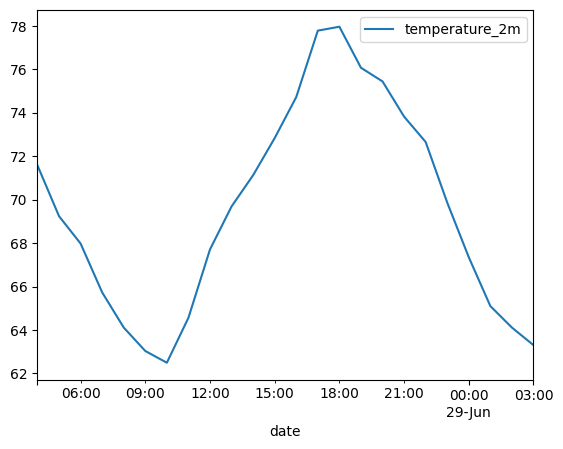

In [1]:
#Import and install the following 
import openmeteo_requests #%pip install openmeteo-requests
import requests_cache #%pip install requests-cache retry-requests numpy pandas
import pandas as pd #%pip install ipympl
from retry_requests import retry
import matplotlib.pyplot as plt #necessary to plot data
import sys 

import numpy as np
import matplotlib.pyplot as plt



def select_variables(hourly_vars): #function to establish variables, scope, location and units of mesaurement and assign them to a single variable, params

	params = {
		"latitude": 40.6613,
		"longitude": -73.9463,
		"current": "temperature_2m",
		"hourly": hourly_vars, 
		#"daily": daily_vars, 
		"temperature_unit": "fahrenheit",
		"wind_speed_unit": "mph",
		"timezone": "America/New_York",
		"forecast_days": 1
	}
	
	return params

def get_response(params): #sends params to API and gets back a data object (<openmeteo_sdk.WeatherApiResponse.WeatherApiResponse object at 0x14738ce50>)

	# More setup
	# Setup the Open-Meteo API client with cache and retry on error
	cache_session = requests_cache.CachedSession('.cache', expire_after = 3600)
	retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
	openmeteo = openmeteo_requests.Client(session = retry_session)

	url = "https://api.open-meteo.com/v1/forecast"
	
	responses = openmeteo.weather_api(url, params=params) #returns list of data objects
	response = responses[0] #gets single response from list 

	return response 

def print_location_info(response): #gets whatever variable user selects; results could be shown as output in GUI

	# Process location and get current values.
	print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
	print(f"Elevation {response.Elevation()} m asl")
	print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
	print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

	current = response.Current()
	current_temperature_2m = current.Variables(0).Value()

	print(f"Current time {current.Time()}")
	print(f"Current temperature_2m {current_temperature_2m}")



# Process hourly data and feed into an array

def process_hourly(response, hourly_vars):
	hourly = response.Hourly() 

	hourly_data = {"date": pd.date_range( #create keys in a dictionary
		start = pd.to_datetime(hourly.Time(), unit = "s", utc = True), #check for timezone
		end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
		freq = pd.Timedelta(seconds = hourly.Interval()),
		inclusive = "left"
	)}

	for i in range(0, len(hourly_vars)): #creates an array of hourly values for variables (i) 
		ar = hourly.Variables(i).ValuesAsNumpy() 
		key = hourly_vars[i]
		hourly_data[key] = ar

	hourly_dataframe = pd.DataFrame(data = hourly_data)
	return hourly_dataframe


#Turn dataframe into a plot
def plot_data(hourly_dataframe, hourly_var_list):

	p = hourly_dataframe.plot(kind='line',
							x = 'date',
							y = hourly_var_list)
	plt.show()

#Test
hourly_vars = ["temperature_2m"]
p = select_variables(hourly_vars)
resp = get_response(p)
print_location_info(resp)
df = process_hourly(resp, hourly_vars)
plot_data(df,hourly_vars)



In [9]:
#Import and install the following 
import openmeteo_requests #%pip install openmeteo-requests
import requests_cache #%pip install requests-cache retry-requests numpy pandas
import pandas as pd #%pip install ipympl
from retry_requests import retry
import matplotlib.pyplot as plt #necessary to plot data
import sys 

import numpy as np
import matplotlib.pyplot as plt

def select_variables(hourly_vars, daily_vars): #function to establish variables, scope, location and units of mesaurement and assign them to a single variable, params

	params = {
		"latitude": 40.6613,
		"longitude": -73.9463,
		"current": "temperature_2m",
		"hourly": hourly_vars, 
		"daily": daily_vars, 
		"temperature_unit": "fahrenheit",
		"wind_speed_unit": "mph",
		"timezone": "America/New_York",
		"forecast_days": 1
	}
	
	return params

In [10]:
def get_response(params): #sends params to API and gets back a data object (<openmeteo_sdk.WeatherApiResponse.WeatherApiResponse object at 0x14738ce50>)

	# More setup
	# Setup the Open-Meteo API client with cache and retry on error
	cache_session = requests_cache.CachedSession('.cache', expire_after = 3600)
	retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
	openmeteo = openmeteo_requests.Client(session = retry_session)

	url = "https://api.open-meteo.com/v1/forecast"
	
	responses = openmeteo.weather_api(url, params=params) #returns list of data objects
	response = responses[0] #gets single response from list 

	return response 

In [8]:
def print_location_info(response): #gets whatever variable user selects; results could be shown as output in GUI

	# Process location and get current values.
	print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
	print(f"Elevation {response.Elevation()} m asl")
	print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
	print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

	current = response.Current()
	current_temperature_2m = current.Variables(0).Value()

	print(f"Current time {current.Time()}")
	print(f"Current temperature_2m {current_temperature_2m}")


	# Process all vars and their data and feed into an array

# Process hourly data and feed into an array

def process_hourly(response, hourly_vars):
	hourly = response.Hourly() 

	hourly_data = {"date": pd.date_range( #create keys in a dictionary
		start = pd.to_datetime(hourly.Time(), unit = "s", utc = True), #check for timezone
		end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
		freq = pd.Timedelta(seconds = hourly.Interval()),
		inclusive = "left"
	)}

	for i in range(0, len(hourly_vars)): #creates an array of hourly values for variables (i) 
		ar = hourly.Variables(i).ValuesAsNumpy() 
		key = hourly_vars[i]
		hourly_data[key] = ar

	hourly_dataframe = pd.DataFrame(data = hourly_data)
	return hourly_dataframe


In [13]:
# Process all vars and their data and feed into an array

def process_vars(response, vars):
    vars = response.Vars() 

    vars_data = {"date": pd.date_range( #create keys in a dictionary
		start = pd.to_datetime(vars.Time(), unit = "s", utc = True), #check for timezone
		end = pd.to_datetime(vars.TimeEnd(), unit = "s", utc = True),
		freq = pd.Timedelta(seconds = vars.Interval()),
		inclusive = "left"
	)}

    for i in range(0, len(vars)):
        ar = vars.Variables(i).ValuesAsNumpy()
        key = vars[i]
        vars_data[key]= ar

    vars_dataframe = pd.DataFrame(data = vars_data)
    return vars_dataframe

In [15]:
#Turn dataframe into a plot
def plot_data(vars_dataframe, var_list):

	p = vars_dataframe.plot(kind='line',
							x = 'date',
							y = var_list)
	plt.show()

#Test
#hourly_vars = ["temperature_2m"]
#daily_vars = ["sunset"]
vars = ["temperature_2m", "sunset"]
p = select_variables(vars)
resp = get_response(p)
print_location_info(resp)
df = process_hourly(resp, vars)
plot_data(df,vars)
#plot_data(hf,daily_vars)



TypeError: select_variables() missing 1 required positional argument: 'daily_vars'